In [96]:
import numpy as np
import pandas as pd
from openpyxl import load_workbook
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------------------------------------------------------------#
#Step 1a: Copy and paste your file path below
file_path= r"D:\Code Test\Test 4.xlsx"

#-----------------------------------------------------------------------------------------------------------------------------#
#Step 1b: Input parameters for gas-aqueous partitioning  

#What temperature did your inclusions form at? Please input a value in celcius below.
Temp_C=25

#What is the NaCl equivalent salinity of your inclusion fluid? Please enter a value in moles/liter below. 
Salinity=7.5

#What is the N2/Ar ratio of your atmosphere? Please enter this ratio below.
#N2_Ar_Atm=83.60171
N2_Ar_Atm=198.05

#-----------------------------------------------------------------------------------------------------------------------------#
#Step 1c (optional): Input the atmospheric composition the inclusions formed under

#Optional: Input Atmospheric Composition

#What are the partial pressures of each gas in the atmosphere? Please enter bar values as decimals (Example: Modern pN2 = 0.7808 bar)
#AtmN2=0.7808
#AtmO2=0.2095
#AtmAr=0.0093
#AtmCO2=0.0004

AtmN2=0.9279
AtmO2=0.0674
AtmAr=0.0047
AtmCO2=0.0


#Would you like to include these values when comparing pre and post partitioned compositions? Input 1 for yes and 0 for no.
Include=1

#-----------------------------------------------------------------------------------------------------------------------------#


In [97]:
#-----------------------------------------------------------------------------------------------------------------------------#
#step 2a:Read and Filter Data from the data from the Excel file
Data = pd.read_excel(file_path)

# Apply filters to each column to remove NaN, None, or empty values
valid_rows = Data.dropna(subset=["Raw_N2%", "Raw_O2%", "Raw_Ar%", "Raw_CO2%"])  # Drop rows where any of the columns are NaN

# Optionally, you can further filter out rows with zero or None values if needed
valid_rows = valid_rows[(valid_rows["Raw_N2%"] != 0) & 
                        (valid_rows["Raw_O2%"] != 0) & 
                        (valid_rows["Raw_Ar%"] != 0) & 
                        (valid_rows["Raw_CO2%"] != 0)]

#Extract the valid data
Raw_N2_Perc = valid_rows["Raw_N2%"].values
Raw_O2_Perc = valid_rows["Raw_O2%"].values
Raw_Ar_Perc = valid_rows["Raw_Ar%"].values
Raw_CO2_Perc = valid_rows["Raw_CO2%"].values

#Store filtered values in an array
Raw_Comp=[Raw_N2_Perc,Raw_O2_Perc,Raw_Ar_Perc,Raw_CO2_Perc]

#determine what columns the data comes from in excel.
column_index = Data.columns.get_loc("Raw_N2%")

#Compute averages and standard deviations of the raw values.

#averages
Raw_avg_N2=np.mean(Raw_N2_Perc)
Raw_avg_O2=np.mean(Raw_O2_Perc)
Raw_avg_Ar=np.mean(Raw_Ar_Perc)
Raw_avg_CO2=np.mean(Raw_CO2_Perc)

#Std deviation
Raw_std_N2=np.std(Raw_N2_Perc)
Raw_std_O2=np.std(Raw_O2_Perc)
Raw_std_Ar=np.std(Raw_Ar_Perc)
Raw_std_CO2=np.std(Raw_CO2_Perc)

#Write averages and standard deviations to Excel using openpyxl
workbook = load_workbook(file_path)
sheet = workbook.active

# Write headers
headers = ["N2 %", "O2 %", "Ar %", "CO2 %"] 
          
#Write to headers to excel
for i, header in enumerate(headers, start=column_index+15):
    sheet.cell(row=2, column=i).value = header

# Write values
Raw_averages = [Raw_avg_N2, Raw_avg_O2, Raw_avg_Ar, Raw_avg_CO2]
Raw_std_devs = [Raw_std_N2, Raw_std_O2, Raw_std_Ar, Raw_std_CO2]

for i, value in enumerate(Raw_averages, start=column_index+15):
    sheet.cell(row=3, column=i).value = value

for i, value in enumerate(Raw_std_devs, start=column_index+15):  # Start after averages
    sheet.cell(row=4, column=i).value = value

sheet.cell(row=1,column=column_index+15).value='Raw Gas Composition'
sheet.cell(row=3,column=column_index+14).value='Mean'
sheet.cell(row=4,column=column_index+14).value='Std.'

# Save the workbook
workbook.save(file_path)

#-----------------------------------------------------------------------------------------------------------------------------#
#Step 2b: Computing Henry's constants based on input temperature and salinities.Values are calculated relative to standard
#conditions (25 C and 0 M NaCl equivalent salinity)

#Compute N2 Solubility (Moles/L*Bar)
H_N2=(1/1600)*(np.exp(1300*((1/(Temp_C+273.15))-(1/298.15))))*10**(-1*0.1464*Salinity)

#Compute O2 Solubility (Moles/L*Bar)
H_O2=(1/770)*(np.exp(1700*((1/(Temp_C+273.15))-(1/298.15))))*10**(-1*0.146*Salinity)

#Compute Ar Solubility (Moles/L*Bar)
H_Ar=(1/710)*(np.exp(1300*((1/(Temp_C+273.15))-(1/298.15))))*10**(-1*0.1408*Salinity)

#Compute CO2 Solubility (Moles/L*Bar)
H_CO2=(1/29)*(np.exp(2400*((1/(Temp_C+273.15))-(1/298.15))))*10**(-1*0.1094*Salinity)

#Put in Array
H_gases=[H_N2,H_O2,H_Ar,H_CO2]
print(H_gases)

#-----------------------------------------------------------------------------------------------------------------------------#
#Step 2c: Calculate N2/Ar at all gas volume fractions


#Compute Ideal gas constant times Temperature ()
RT = 0.083144*(Temp_C+273.15)


#Create Array of gas volume fractions from 0 to 1
gvf=np.linspace(0,1,10000)

#Compute N2_Ar as a function of the gas volume fraction
N2_Ar_Ratio_GVF=N2_Ar_Atm*((gvf/RT)+(1-gvf)*H_N2)/((gvf/RT)+(1-gvf)*H_Ar)

#Compute Aqueous N2/Ar Ratio (GVF = 0)
N2_Ar_Aqueous=N2_Ar_Ratio_GVF[0]

#-----------------------------------------------------------------------------------------------------------------------------#

#Miscellaneous Constants





#-----------------------------------------------------------------------------------------------------------------------------#

[4.987466795424853e-05, 0.00010435404184228796, 0.00012380598828604003, 0.005213171377106264]


In [98]:
#-----------------------------------------------------------------------------------------------------------------------------#
#Step 3a: Defining Functions

#Function 1: Computes the gas volume fraction from the observed N2/Ar ratio. This is done using equation 6 in Park and Schaller
#(2024)
def Compute_GVF(Raw_N2,Raw_Ar):
    N2_Ar_Obs=Raw_N2/Raw_Ar
    Ratio_N2Ar=N2_Ar_Obs/N2_Ar_Atm
    GVF=(Ratio_N2Ar*H_Ar-H_N2)/(((1-Ratio_N2Ar)/RT)+Ratio_N2Ar*H_Ar-H_N2)
    
    #if the observed N2/Ar is lower than the aqueous end member, the gas volume fraction is set to 0.
    if N2_Ar_Obs < N2_Ar_Aqueous:
        return 0.0
    #If the value is above the atmospheric end member, the gas volume fraction is set to 1
    elif N2_Ar_Obs > N2_Ar_Atm:
        return 1.0
    # all other values are converted following equation 6 in Park and Schaller (2024)
    elif N2_Ar_Aqueous <= N2_Ar_Obs <= N2_Ar_Atm:
        return GVF
    
#Function 2: Raw Gas ratios are partitioned based on the computed gas volume fractions. Calculations follow equation 7
# Park and Schaller (2024)
def Partition_Gas_Ratios(gas_vol_frac,Raw_N2,Raw_O2,Raw_Ar,Raw_CO2):
    #compute Y(gvf,T,S) for N2
    N2_Y=gas_vol_frac/RT+(1-gas_vol_frac)*H_N2
    #compute Y(gvf,T,S) for O2
    O2_Y=gas_vol_frac/RT+(1-gas_vol_frac)*H_O2
    #compute Y(gvf,T,S) for Ar
    Ar_Y=gas_vol_frac/RT+(1-gas_vol_frac)*H_Ar
    #compute Y(gvf,T,S) for CO2
    CO2_Y=gas_vol_frac/RT+(1-gas_vol_frac)*H_CO2
    
    #Compute moles/Y for N2
    ratio_N2=Raw_N2/N2_Y
    #Compute moles/Y for O2
    ratio_O2=Raw_O2/O2_Y
    #Compute moles/Y for Ar
    ratio_Ar=Raw_Ar/Ar_Y
    #Compute moles/Y for CO2
    ratio_CO2=Raw_CO2/CO2_Y
    #Sum  Values
    Sum=ratio_N2+ratio_O2+ratio_Ar+ratio_CO2
    
    #Partitioned N2%
    Par_N2=ratio_N2/Sum
    #Partitioned O2%
    Par_O2=ratio_O2/Sum
    #Partitioned Ar%
    Par_Ar=ratio_Ar/Sum
    #Partitioned CO2
    Par_CO2=ratio_CO2/Sum
    
    #send partitioned compositions to an array
    Comp=[Par_N2,Par_O2,Par_Ar,Par_CO2]
    return Comp

#-----------------------------------------------------------------------------------------------------------------------------#
#step 3b: Defining functions for optional plots (see step 1C)

## The following code will produce predicted mole fractions based on the atmospheric composition input above. 

#Function 3: Computes the mole fraction of each gas in an inclusion as a function of the gas volume fraction. 
def moles_per_volume_i(gvf,H_i,P_i):
    Y_i=[(gvf/RT)+(1-gvf)*H_i]
    n_i_per_liter=np.multiply(P_i,Y_i)
    return n_i_per_liter

#Function 4: This function computes mole fractions of 
def mole_fractions(N2_mole,O2_mole,Ar_mole,CO2_mole):
    sum_gas=(N2_mole+O2_mole+Ar_mole+CO2_mole)
    
    mf_N2=N2_mole/sum_gas
    mf_O2=O2_mole/sum_gas
    mf_Ar=Ar_mole/sum_gas
    mf_CO2=CO2_mole/sum_gas
    
    Gas_Comp=[mf_N2,mf_O2,mf_Ar,mf_CO2]
    return Gas_Comp

#-----------------------------------------------------------------------------------------------------------------------------#
#step 3c: Defining functions to statistically evaluate modeled atmospheres.


def Stats(predicted, observed):
    #predicted_array=predicted.values
    #observed_array = observed.values
    #Compute Residual Sum of Squares
    RSS = np.sum((observed - predicted) ** 2)
    #Compute Mean Squared Error
    MSE = mean_squared_error(observed, predicted)
    #Compute R squared
    r2 = r2_score(observed, predicted)
    #Throw in array
    Stat_Values = [RSS, MSE, r2]
    print(f'RSS: {RSS}, MSE: {MSE}, R2: {r2}')
    return Stat_Values


#-----------------------------------------------------------------------------------------------------------------------------#
#Step 3d: Functions that aid in plotting
def percent_formatter(x, pos):
    if x > 0.09:  # Check if x is greater than 10
        return '{:.1f}%'.format(x * 100)  # Format without decimals
    elif x>0.00009:
        return '{:.2f}%'.format(x * 100) 
    if x==0:
        return '0.00%'
    else:
        return '{:.0e}%'.format(x * 100)

In [99]:
# Initialize empty lists to store results
Sample_N2_Ar_List=[]
Sample_GVF_list = []
Sample_Part_Gas_Comp_list = []
count_array = np.arange(1, len(Raw_N2_Perc) + 1)

# Loop through all values in Raw_N2_Perc and compute functions for each
for i in range(len(Raw_N2_Perc)):
    # Compute Practice_GVF and Practice_Gas_Comp for each value
    Sample_N2_Ar=Raw_N2_Perc[i]/Raw_Ar_Perc[i]
    Sample_GVF = Compute_GVF(Raw_N2_Perc[i], Raw_Ar_Perc[i])
    Sample_Part_Gas_Comp = Partition_Gas_Ratios(Sample_GVF, Raw_N2_Perc[i], Raw_O2_Perc[i], Raw_Ar_Perc[i], Raw_CO2_Perc[i])
    # Append results to lists
    Sample_N2_Ar_List.append(Sample_N2_Ar)
    Sample_GVF_list.append(Sample_GVF)
    Sample_Part_Gas_Comp_list.append(Sample_Part_Gas_Comp)

# Convert Practice_Gas_Comp_list to a numpy array for easier calculation of mean and std dev
Sample_Part_Gas_Comp_array = np.array(Sample_Part_Gas_Comp_list)
Sample_GVF_array = np.array(Sample_GVF_list)

# Calculate averages and standard deviations
Part_averages = np.mean(Sample_Part_Gas_Comp_array, axis=0)
Part_std_devs = np.std(Sample_Part_Gas_Comp_array, axis=0)

# Load the Excel file using openpyxl
workbook = load_workbook(file_path)
sheet = workbook.active

# Write Practice__N2_Ar values to a specific column, say column F (index 6)
for row, value in enumerate(Sample_N2_Ar_List, start=2):  # Assuming data starts at row 2
    sheet.cell(row=row, column=column_index+6, value=value)

# Write Practice_GVF values to a specific column, say column G (index 7)
for row, value in enumerate(Sample_GVF_list, start=2):  # Assuming data starts at row 2
    sheet.cell(row=row, column=column_index+7, value=value)

# Write Practice_Gas_Comp values to specific columns
for row_idx, row_values in enumerate(Sample_Part_Gas_Comp_array, start=2):  
    for col_idx, value in enumerate(row_values, start=column_index + 9):
        sheet.cell(row=row_idx, column=col_idx, value=value)

# Label the columns
column_labels = ["N2/Ar", "GVF", "Part. N2%", "Part. O2%", "Part. Ar%", "Part. CO2%"]
columns = [column_index+6, column_index+7, column_index+9, column_index+10, column_index+11, column_index+12]  # Corresponding column indices for labels

for col, label in zip(columns, column_labels):
    sheet.cell(row=1, column=col, value=label)
    
for i, header in enumerate(headers, start=column_index+15):
    sheet.cell(row=7, column=i).value = header
    
sheet.cell(row=6,column=column_index+15,value="Partitioned Gas Composition")   
sheet.cell(row=8,column=column_index+14,value="Mean")
sheet.cell(row=9,column=column_index+14,value="std.")

# Write averages to cells O2 to R2
for col, value in enumerate(Part_averages, start=column_index+15):  # Column O is index 15
    sheet.cell(row=8, column=col, value=value)

# Write standard deviations to cells O3 to R3
for col, value in enumerate(Part_std_devs, start=column_index+15):  # Column O is index 15
    sheet.cell(row=9, column=col, value=value)
# Save the workbook
workbook.save(file_path)


#-----------------------------------------------------------------------------------------------------------------------------#
#Step : Computing modeled compositions based on calculated gas volume fractions and input atmosphere composition.
Modeled_N2_mpv=moles_per_volume_i(gvf,H_N2,AtmN2)
Modeled_O2_mpv=moles_per_volume_i(gvf,H_O2,AtmO2)
Modeled_Ar_mpv=moles_per_volume_i(gvf,H_Ar,AtmAr)
Modeled_CO2_mpv=moles_per_volume_i(gvf,H_CO2,AtmCO2)

Modeled_Mole_Fractions=mole_fractions(Modeled_N2_mpv,Modeled_O2_mpv,Modeled_Ar_mpv,Modeled_CO2_mpv)


N22=moles_per_volume_i(Sample_GVF_array,H_N2,AtmN2)
O22=moles_per_volume_i(Sample_GVF_array,H_O2,AtmO2)
Ar2=moles_per_volume_i(Sample_GVF_array,H_Ar,AtmAr)
CO22=moles_per_volume_i(Sample_GVF_array,H_CO2,AtmCO2)

Modeled_MF_from_Calc_GVF=mole_fractions(N22,O22,Ar2,CO22)
#print(Modeled_MF_from_Calc_GVF)

#-----------------------------------------------------------------------------------------------------------------------------#
#Step : Computing residuals, RSS, MSE, and R-squared between modeled and raw gas compositions

N2_O2_Obs=Raw_Comp[0]/Raw_Comp[1]
N2_O2_Mod=Modeled_MF_from_Calc_GVF[0].flatten()/Modeled_MF_from_Calc_GVF[1].flatten()

N2_O2_Stats=Stats(N2_O2_Mod, N2_O2_Obs)

# Initialize an empty list to store the statistics
Gas_Stats = []
# Loop through each gas type, calculate stats, and append to Gas_Stats
for i in range(4):
    stats = Stats(Modeled_MF_from_Calc_GVF[i].flatten(), Raw_Comp[i])
    Gas_Stats.append(stats)

RSS: 17.017791262689858, MSE: 1.8908656958544288, R2: 0.42091051649811273
RSS: 0.041774579502127714, MSE: 0.0046416199446808575, R2: -0.290276038999302
RSS: 0.0021022760131650807, MSE: 0.00023358622368500897, R2: -0.17505196170978854
RSS: 5.158256174023502e-06, MSE: 5.731395748915002e-07, R2: -0.9493958320257065
RSS: 0.05747109545527941, MSE: 0.0063856772728088235, R2: -0.9095785743621045


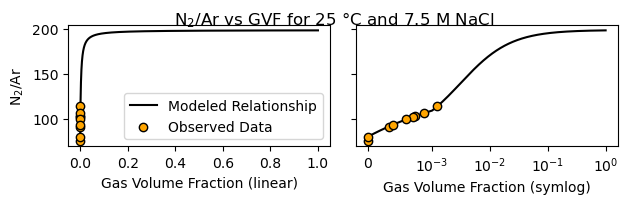

Figure 1: N$_2$/Ar ratios are plotted against computed gas volume fractions. 


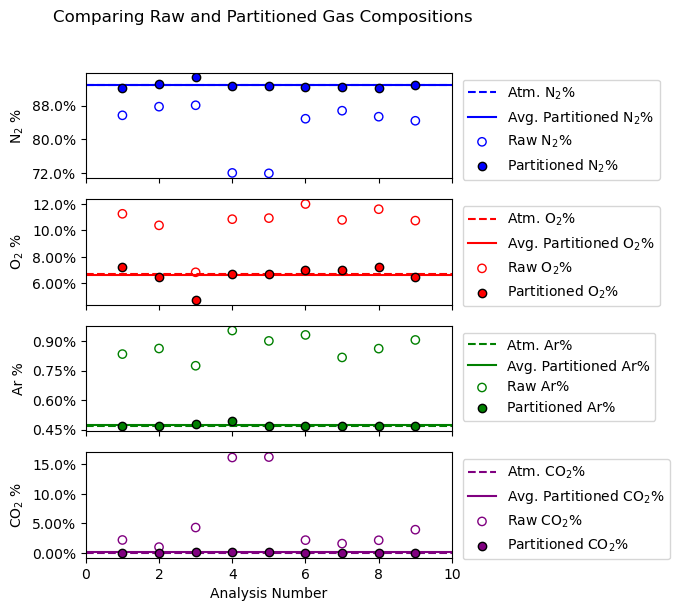

Figure 2: Raw and gas-aqueous partitioned mole fractions are compared.


In [100]:

#Convert inches to mm
mm=1/25.4
#set dimensions for figures
fig1_size=(180*mm,40*mm)
fig2_size=(120*mm,160*mm)


fig, axs = plt.subplots(1, 2, sharey=True, gridspec_kw={'wspace': 0.1}, figsize=fig1_size)
x_labels = ['Gas Volume Fraction (linear)', 'Gas Volume Fraction (symlog)']
x_scales = ['linear', 'symlog']

for i in range(2):
    axs[i].plot(gvf, N2_Ar_Ratio_GVF, c='black', zorder=0, label='Modeled Relationship')
    axs[i].scatter(Sample_GVF_list, Sample_N2_Ar_List, c='orange', edgecolor='black', marker='o', label='Observed Data')
    axs[i].set_xlabel(x_labels[i])
    if x_scales[i] == 'symlog':
        axs[i].set_xscale('symlog', linthresh=1E-3)
    if i == 0:
        axs[i].set_ylabel('N$_2$/Ar')
        axs[i].legend(loc='lower right')

fig.suptitle(f'N$_2$/Ar vs GVF for {Temp_C} °C and {Salinity} M NaCl')
plt.show()

print("Figure 1: N$_2$/Ar ratios are plotted against computed gas volume fractions. ")

#-----------------------------------------------------------------------------------------------------------------------------#


fig, axs = plt.subplots(4, 1, sharex=True, gridspec_kw={'hspace': 0.2}, figsize=fig2_size)

colors = ['blue', 'red', 'green', 'purple']
gas_labels = ['N$_2$', 'O$_2$', 'Ar', 'CO$_2$']
atmospheric_values = [AtmN2, AtmO2, AtmAr, AtmCO2]

for i in range(4):
    axs[i].plot([0, len(Raw_N2_Perc) + 1], [atmospheric_values[i], atmospheric_values[i]], zorder=0, color=colors[i], linestyle='--', label=f'Atm. {gas_labels[i]}%')
    axs[i].plot([0, len(Raw_N2_Perc) + 1], [Part_averages[i], Part_averages[i]], zorder=0, color=colors[i], label=f'Avg. Partitioned {gas_labels[i]}%')
    axs[i].scatter(count_array, Raw_Comp[i], color='none', edgecolor=colors[i], zorder=1, label=f'Raw {gas_labels[i]}%')
    axs[i].scatter(count_array, Sample_Part_Gas_Comp_array[:, i], color=colors[i], edgecolor='black', zorder=2, label=f'Partitioned {gas_labels[i]}%')
    axs[i].set_ylabel(f"{gas_labels[i]} %")
    axs[i].legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    
    # Set y-axis limits slightly larger than the range of y values shown
    min_y = min(min(Raw_Comp[i]), min(Sample_Part_Gas_Comp_array[:, i]), atmospheric_values[i], Part_averages[i])
    max_y = max(max(Raw_Comp[i]), max(Sample_Part_Gas_Comp_array[:, i]), atmospheric_values[i], Part_averages[i])
    range_y = max_y - min_y
    axs[i].set_ylim(min_y - 0.05 * range_y, max_y + 0.05 * range_y)

    # Set 4 evenly spaced ticks on the y-axis
    axs[i].yaxis.set_major_locator(ticker.MaxNLocator(4))
    axs[i].yaxis.set_major_formatter(FuncFormatter(percent_formatter))

axs[3].set_xlim(0, len(Raw_N2_Perc) + 1)
axs[3].set_xlabel('Analysis Number')

fig.suptitle('Comparing Raw and Partitioned Gas Compositions')
plt.show()

print("Figure 2: Raw and gas-aqueous partitioned mole fractions are compared.")

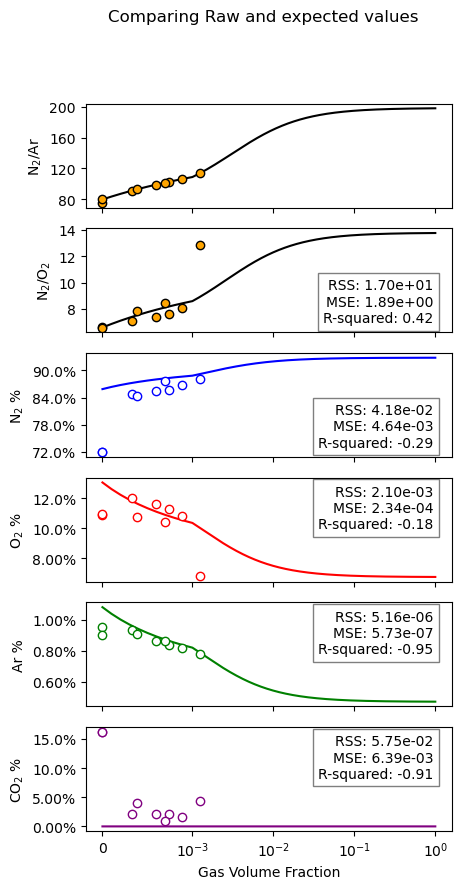

In [101]:
from matplotlib.ticker import MaxNLocator, ScalarFormatter
import matplotlib.pyplot as plt

fig3_size=(120*mm,240*mm)
locator = MaxNLocator(nbins=4, prune='both')  # Ensure 4 ticks

fig, axs = plt.subplots(6, 1, sharex=True, gridspec_kw={'hspace': 0.2}, figsize=fig3_size)

axs[0].plot(gvf, N2_Ar_Ratio_GVF, c='black', zorder=0, label='Modeled Relationship')
axs[0].scatter(Sample_GVF_list, Sample_N2_Ar_List, c='orange', edgecolor='black', marker='o', label="Observed Data")
axs[0].set_ylabel('N$_2$/Ar')
axs[0].set_xscale('symlog', linthresh=1E-3)
axs[0].yaxis.set_major_locator(MaxNLocator(nbins=4, prune='both'))

axs[1].plot(gvf, Modeled_Mole_Fractions[0].flatten()/Modeled_Mole_Fractions[1].flatten(), color='black', zorder=0)
axs[1].scatter(Sample_GVF_list, Raw_N2_Perc/Raw_O2_Perc, color='orange', edgecolor='black')
axs[1].set_ylabel('N$_2$/O$_2$')
axs[1].yaxis.set_major_locator(MaxNLocator(nbins=4, prune='both'))

stats_text = (f'RSS: {N2_O2_Stats[0]:.2e}\n'
              f'MSE: {N2_O2_Stats[1]:.2e}\n'
              f'R-squared: {N2_O2_Stats[2]:.2f}')
axs[1].text(0.95, 0.07, stats_text, transform=axs[1].transAxes, fontsize=10,
            verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

for i in range(4):
    ax = axs[i + 2]
    modeled_curve = Modeled_Mole_Fractions[i].flatten()
    ax.plot(gvf, modeled_curve, color=colors[i], zorder=0)
    ax.scatter(Sample_GVF_list, Raw_Comp[i], color='white', edgecolor=colors[i])
    ax.set_ylabel(f'{gas_labels[i]} %')
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4, prune='both'))
    ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

    # Adding text box with statistics
    stats_text = (f'RSS: {Gas_Stats[i][0]:.2e}\n'
                  f'MSE: {Gas_Stats[i][1]:.2e}\n'
                  f'R-squared: {Gas_Stats[i][2]:.2f}')
    if i == 0:
        ax.text(0.95, 0.07, stats_text, transform=ax.transAxes, fontsize=10,
                verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
    else:
        ax.text(0.95, 0.93, stats_text, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

axs[5].set_xlabel('Gas Volume Fraction')

fig.suptitle(f'Comparing Raw and expected values')
plt.show()
